In [1]:
import pandas as pd
from plot_utils import item_scatter, add_noise_to_pred
from resources import item_scatter_style

## Settings

In [2]:
fname = '../../data/brain-lang-data_participant_20230728.csv'
df = pd.read_csv(fname)

save = False
PLOTDIR = None # Where to store plots
CSVDIR = None # Where to store accompanying CSV files

## Figure 3

In [5]:
# A couple of plotting parameters shared between Figure 3 and the inset figure
target_UID_flag = ['797', '841', '880']
roi_flag = 'lang_LH_netw'
target_norm = 'bySessVoxZ'
target_UID_flag_str = '-'.join(target_UID_flag)

plot_aspect_flag, add_identity_flag, d_xlim, d_ylim = item_scatter_style(style_setting='wide')

xlim_flag = d_xlim[roi_flag][target_norm][target_UID_flag_str]
ylim_flag = d_ylim[roi_flag][target_norm][target_UID_flag_str]

Scatter plot of the observed brain responses (y-axis; from n=3 evaluation participants) versus the encoding model predictions (x-axis) for each sentence (n=1,000 baseline sentences, n=250 drive sentences, and n=250 suppress sentences).



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_YERR=None_xl=-0.75-0.75_yl=-2-2_mean=True_a=0.8_i=True_797-841-880_lang_LH_netw_Fig3
Total number of data points across 3 participants: 4500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -1.347397 and max of response_target: 1.497439


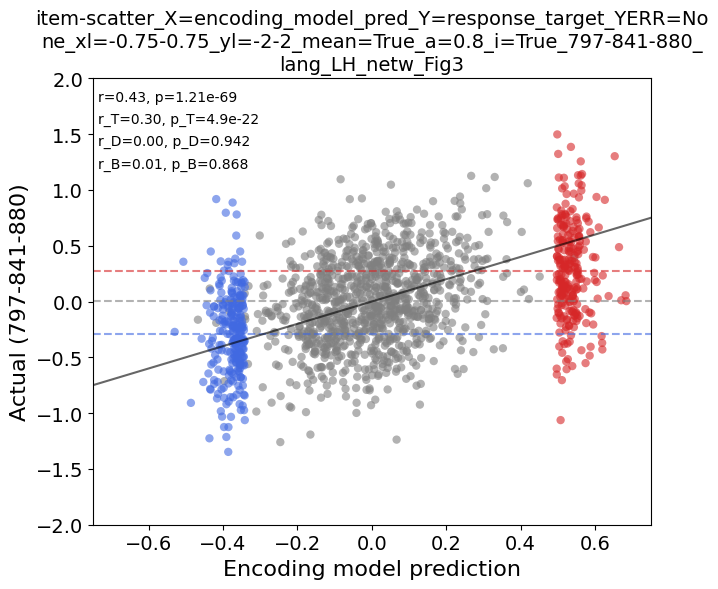

In [4]:
item_scatter(df=df,
             rois_of_interest=roi_flag,
             target_UIDs=target_UID_flag,
             x_val='encoding_model_pred',
             y_val='response_target',
             yerr_type=None,
             add_mean=True,
             plot_aspect=plot_aspect_flag,
             add_identity=add_identity_flag,
             xlim=xlim_flag,
             ylim=ylim_flag,
             save=save,
             base_savestr='Fig3',
             add_savestr='',
             PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## Figure 3 inset

Simulated brain responses (y-axis) versus of encoding model predictions (x-axis). The simulated brain responses (y-axis) were obtained by sampling from a noise distribution representing the empirical inter-participant variability. The analysis illustrates the maximum possible predictive performance, given inter-participant variability and fMRI measurement noise.



Plotting: item-scatter_X=encoding_model_pred_Y=encoding_model_pred_noise_YERR=None_xl=-0.75-0.75_yl=-2-2_mean=True_a=0.8_i=True_797-841-880_lang_LH_netw_Fig3_inset
Total number of data points across 3 participants: 4500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of encoding_model_pred_noise: -1.598250 and max of encoding_model_pred_noise: 1.862285


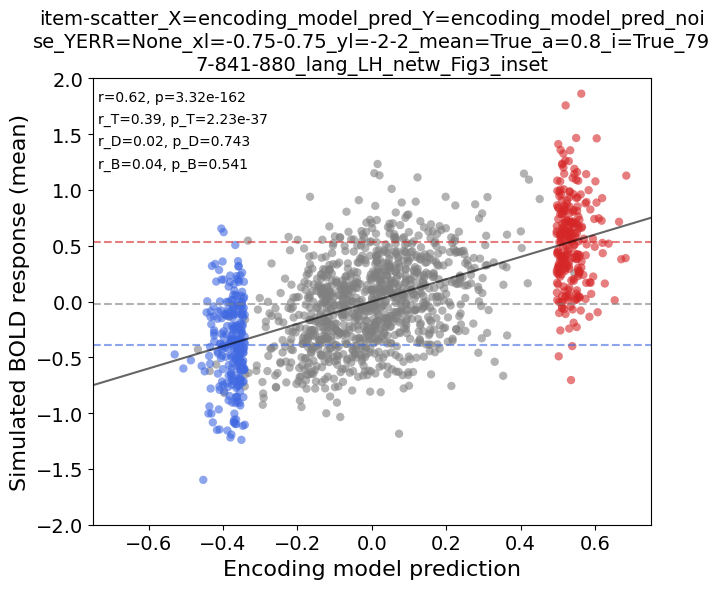

In [5]:
df_roi = df[df['roi'].isin([roi_flag])] # Only use one ROI for the simulation computation
df_roi = df_roi[df_roi['target_UID'].isin([int(x) for x in target_UID_flag])] # Constrain to participants of interest

df_roi = add_noise_to_pred(df=df_roi,
                            pred_col='encoding_model_pred',
                            neural_col='response_target',
                            pooled_neural_sd=None,
                            num_participants=None)  # Compute the last two empirically

item_scatter(df=df_roi,
             rois_of_interest=roi_flag,
             target_UIDs=target_UID_flag,
             x_val='encoding_model_pred',
             y_val='encoding_model_pred' + '_noise',
             yerr_type=None,
             add_mean=True,
             plot_aspect=plot_aspect_flag,
             add_identity=add_identity_flag,
             xlim=xlim_flag,
             ylim=ylim_flag,
             save=save,
             base_savestr='Fig3_inset',
             add_savestr='',
             PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## Various supplementary figures / information pertaining to the sentence-level responses

## SI Figure 12

Sentence-level brain responses from each of the three evaluation participants versus predicted responses from the encoding model.



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_YERR=None_xl=-0.75-0.75_yl=-3-3_mean=True_a=0.8_i=True_797_lang_LH_netw_SI_Fig12_['797']
Total number of data points across 1 participants: 1500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -2.249420 and max of response_target: 2.151151


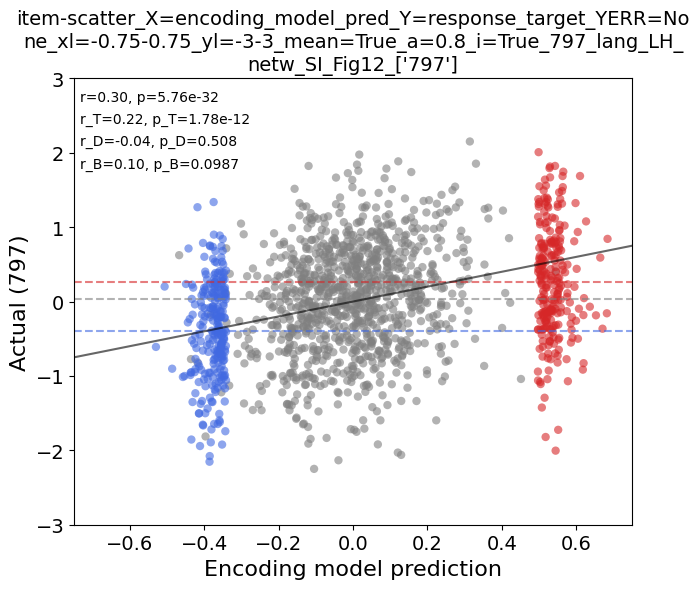



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_YERR=None_xl=-0.75-0.75_yl=-3-3_mean=True_a=0.8_i=True_841_lang_LH_netw_SI_Fig12_['841']
Total number of data points across 1 participants: 1500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -1.887515 and max of response_target: 2.611121


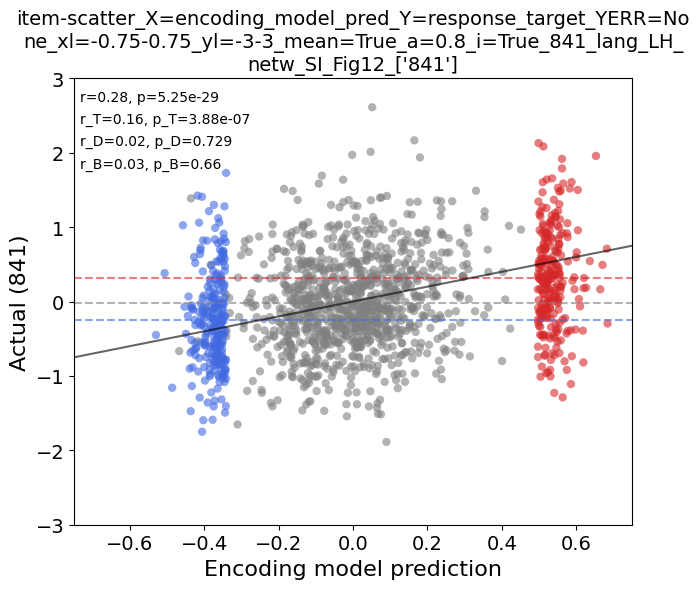



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_YERR=None_xl=-0.75-0.75_yl=-3-3_mean=True_a=0.8_i=True_880_lang_LH_netw_SI_Fig12_['880']
Total number of data points across 1 participants: 1500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target: -2.365444 and max of response_target: 2.221615


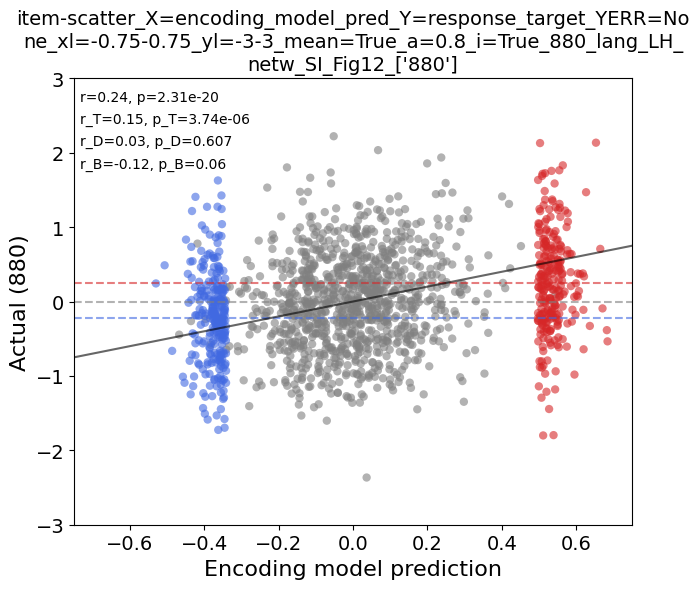

In [7]:
# Plotting parameters 
target_UID_flags = [['797'], ['841'], ['880']]
roi_flag = 'lang_LH_netw'
target_norm = 'bySessVoxZ'
plot_aspect_flag, add_identity_flag, d_xlim, d_ylim = item_scatter_style(style_setting='wide')

for target_UID_flag in target_UID_flags:
    target_UID_flag_str = '-'.join(target_UID_flag)
    
    xlim_flag = d_xlim[roi_flag][target_norm][target_UID_flag_str]
    ylim_flag = d_ylim[roi_flag][target_norm][target_UID_flag_str]

    item_scatter(df=df,
                 rois_of_interest=roi_flag,
                 target_UIDs=target_UID_flag,
                 x_val='encoding_model_pred',
                 y_val='response_target',
                 yerr_type=None,
                 add_mean=True,
                 plot_aspect=plot_aspect_flag,
                 add_identity=add_identity_flag,
                 xlim=xlim_flag,
                 ylim=ylim_flag,
                 save=save,
                 base_savestr=f'SI_Fig12_{target_UID_flag}',
                 add_savestr='',
                 PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )

## SI Figure 13

Scatter plot of the observed, un-normalized brain responses (y-axis; from n=3 evaluation participants) versus the encoding model predictions (x-axis) for each sentence (n=1,000 baseline sentences, n=250 drive sentences, and n=250 suppress sentences).

In [3]:
# Plotting parameters 
target_UID_flag = ['797', '841', '880']
roi_flag = 'lang_LH_netw'
target_norm = 'None'
target_UID_flag_str = '-'.join(target_UID_flag)

plot_aspect_flag, add_identity_flag, d_xlim, d_ylim = item_scatter_style(style_setting='wide')

xlim_flag = d_xlim[roi_flag][target_norm][target_UID_flag_str]
ylim_flag = d_ylim[roi_flag][target_norm][target_UID_flag_str]



Plotting: item-scatter_X=encoding_model_pred_Y=response_target_non_norm_YERR=None_xl=-0.75-0.75_yl=-1.5-1.5_mean=True_a=0.8_i=True_797-841-880_lang_LH_netw_SI_Fig13
Total number of data points across 3 participants: 4500
Min of encoding_model_pred: -0.529797 and max of encoding_model_pred: 0.684224
Min of response_target_non_norm: -0.796332 and max of response_target_non_norm: 1.214285


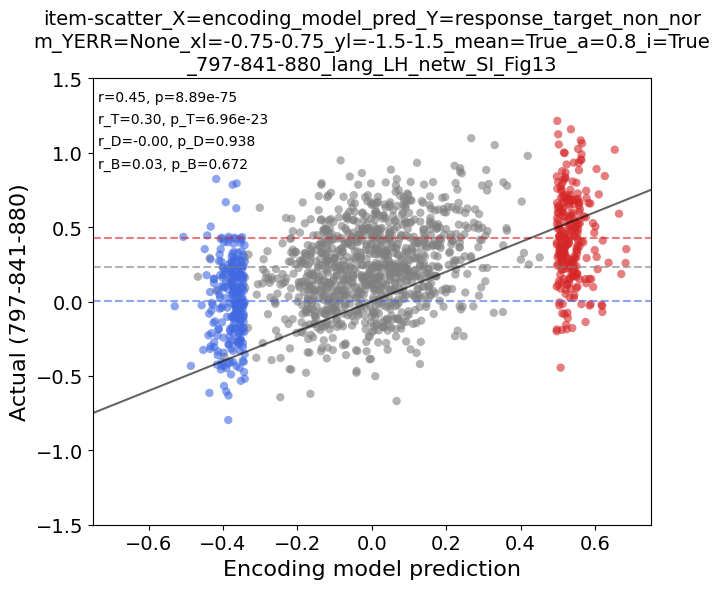

In [5]:
item_scatter(df=df,
             rois_of_interest=roi_flag,
             target_UIDs=target_UID_flag,
             x_val='encoding_model_pred',
             y_val='response_target_non_norm',
             yerr_type=None,
             add_mean=True,
             plot_aspect=plot_aspect_flag,
             add_identity=add_identity_flag,
             xlim=xlim_flag,
             ylim=ylim_flag,
             save=save,
             base_savestr='SI_Fig13',
             add_savestr='',
             PLOTDIR=PLOTDIR, CSVDIR=CSVDIR, )